In [3]:
import pandas as pd

# Load the data

In [11]:
eth_ticker_raw = pd.read_csv("../data/ticker_data/USDT_ETH.csv",index_col=0)
btc_ticker_raw = pd.read_csv("../data/ticker_data/USDT_BTC.csv",index_col=0)          

In [66]:
eth_ticker_raw.dtypes

Close        float64
Timestamp      int64
High         float64
Low          float64
Open         float64
dtype: object

In [6]:
ticker_data_merged = eth_ticker_raw.set_index("Timestamp")\
                .join(
                        btc_ticker_raw.set_index("Timestamp"),
                        on="Timestamp",
                        how="inner",
                        lsuffix="_eth",
                        rsuffix="_btc")

In [42]:
import numpy as np

# in minutes 
minutes = 60*24*4
data_point_bucket_size = str(minutes) + "T"

datetime = pd.to_datetime(ticker_data_merged.index,unit='s') 


agg_method = {'Close_eth': "last",
                "High_eth": np.max, 
                "Low_eth": np.min,
                "Open_eth": "first",
                "Close_btc": "last",
                "High_btc": np.max, 
                "Low_btc": np.min,
                "Open_btc": "first", 
                 }

ticker_data = ticker_data_merged.set_index(datetime)\
                                    .resample(data_point_bucket_size)\
                                    .agg(agg_method)

print("Shape of reshaped data: " + str(ticker_data.shape))
print("Shape of original data: " + str(ticker_data_merged.shape))

Shape of reshaped data: (261, 8)
Shape of original data: (300430, 8)


In [67]:
datetime

DatetimeIndex(['2015-08-08 06:15:00', '2015-08-08 06:20:00',
               '2015-08-08 06:25:00', '2015-08-08 06:30:00',
               '2015-08-08 06:35:00', '2015-08-08 06:40:00',
               '2015-08-08 06:45:00', '2015-08-08 06:50:00',
               '2015-08-08 06:55:00', '2015-08-08 07:00:00',
               ...
               '2018-06-16 09:15:00', '2018-06-16 09:20:00',
               '2018-06-16 09:25:00', '2018-06-16 09:30:00',
               '2018-06-16 09:35:00', '2018-06-16 09:40:00',
               '2018-06-16 09:45:00', '2018-06-16 09:50:00',
               '2018-06-16 09:55:00', '2018-06-16 10:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=300430, freq=None)

In [43]:
ticker_data.head()

,Close_eth,High_eth,Low_eth,Open_eth,Close_btc,High_btc,Low_btc,Open_btc
Timestamp,,,,,,,,
2015-08-08,1.10,1.85,0.500000,0.33,269.256046,282.235975,261.606153,275.603572
2015-08-12,1.50,2.20,0.900001,1.10,258.276850,275.626366,255.000000,269.256046
2015-08-16,1.30,1.77,1.010000,1.50,226.999999,264.818575,174.570134,258.276850
2015-08-20,1.50,1.73,1.250000,1.30,228.452647,285.000000,225.000000,226.999999
2015-08-24,1.27,1.50,1.000000,1.50,220.000000,236.999999,197.574000,228.452647


# Price over time

<IPython.core.display.Javascript object>


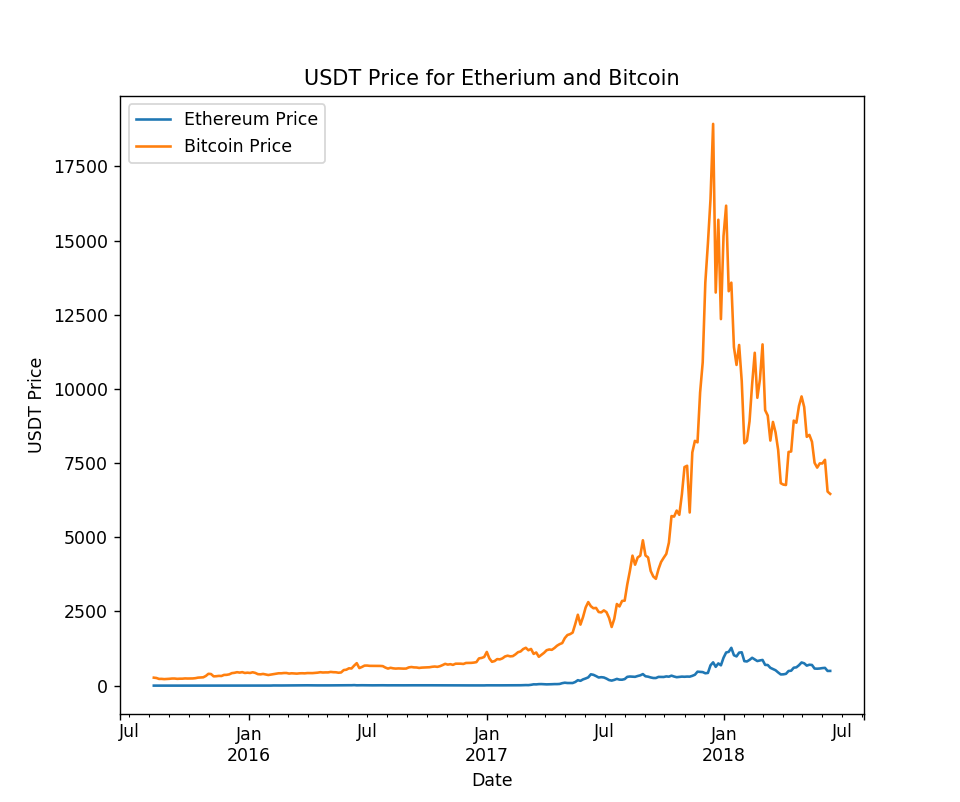

In [62]:
%matplotlib notebook
ax = ticker_data.plot(y=["Close_eth","Close_btc"])
ax.set_title("USDT Price for Etherium and Bitcoin")
ax.set_xlabel("Date")
ax.set_ylabel("USDT Price")
ax.legend(["Ethereum Price","Bitcoin Price"])

<IPython.core.display.Javascript object>


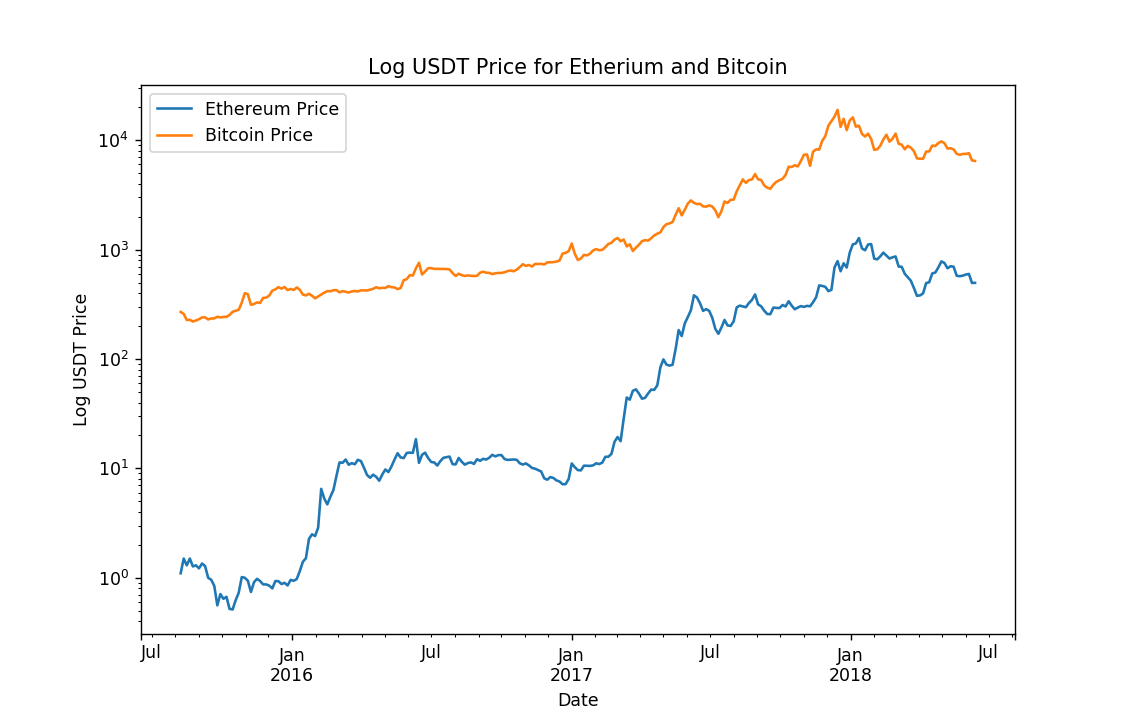

In [63]:
%matplotlib notebook
ax = ticker_data.plot(y=["Close_eth","Close_btc"],logy=True)
ax.set_title("Log USDT Price for Etherium and Bitcoin")
ax.set_xlabel("Date")
ax.set_ylabel("Log USDT Price")
ax.legend(["Ethereum Price","Bitcoin Price"])

# Change in closing price

In [50]:
ticker_data_change = ticker_data.copy()
ticker_data_change["prc_btc_change"] = ticker_data.Close_btc.pct_change()
ticker_data_change["prc_eth_change"] = ticker_data.Close_eth.pct_change()

<IPython.core.display.Javascript object>


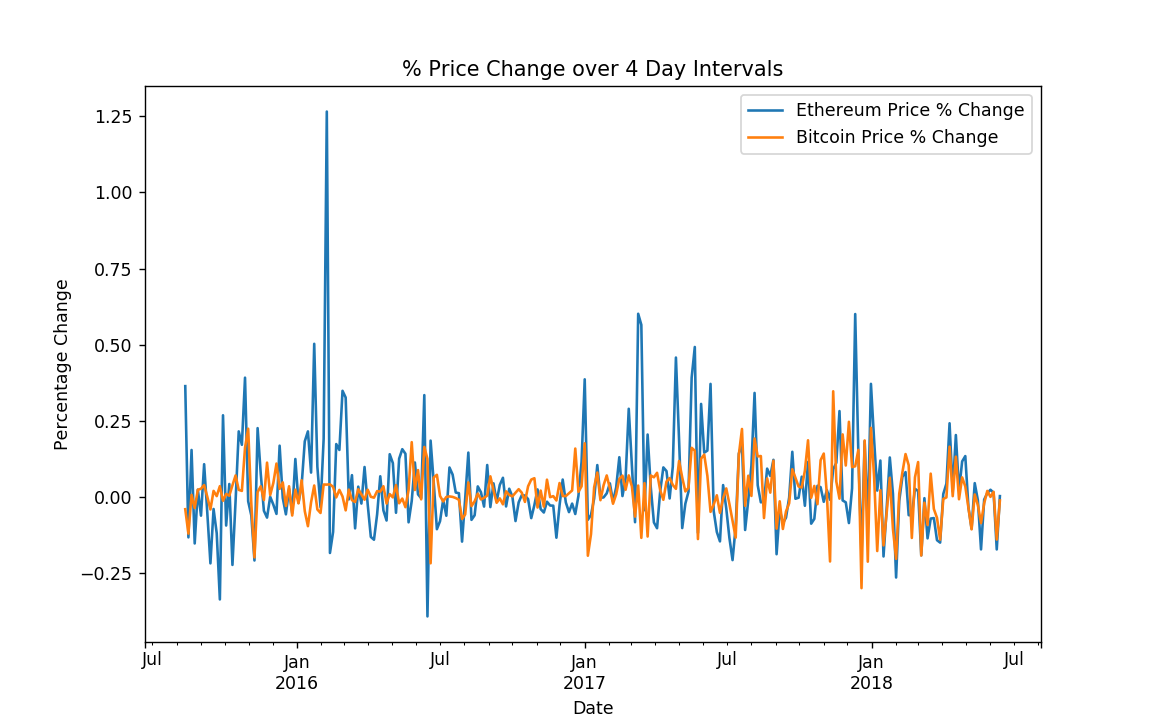

In [64]:
ax = ticker_data_change.plot(y=["prc_eth_change","prc_btc_change"])
ax.set_title("% Price Change over 4 Day Intervals")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage Change")
ax.legend(["Ethereum Price % Change","Bitcoin Price % Change"])